In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

/anaconda/envs/py35/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda/envs/py35/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


# Part 1 - Data Preprocessing

### Import dataset

In [2]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [10]:
dataset_train.shape

(1258, 6)

In [7]:
training_set = dataset_train.iloc[:,1:2].values

### Feature Scaling

In [9]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

### Creating data structure with 60 timestamps and 1 output

In [11]:
X_train = []
y_train = []
for i in range(60,1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

In [13]:
X_train.shape

(1198, 60)

In [14]:
y_train.shape

(1198,)

### Reshaping

In [15]:
# reshape to 3 dimesnsions - No of stock prices, No of timestamps, No of indicatores
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [16]:
X_train.shape

(1198, 60, 1)

# Part 2 - Building the RNN

In [17]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

### Innitializing the RNN

In [18]:
regressor = Sequential()

### Adding first LSTM layer and some Dropout regularization

In [20]:
regressor.add(LSTM(50, return_sequences=True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


### Adding second LSTM layer and some Dropout regularization

In [21]:
regressor.add(LSTM(50, return_sequences=True))
regressor.add(Dropout(0.2))

### Adding third LSTM layer and some Dropout regularization

In [23]:
regressor.add(LSTM(50, return_sequences=True))
regressor.add(Dropout(0.2))

### Adding forth LSTM layer and some Dropout regularization

In [24]:
regressor.add(LSTM(50, return_sequences=False))
regressor.add(Dropout(0.2))

### Adding the output layer

In [27]:
regressor.add(Dense(1))

In [48]:
regressor.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 60, 50)            10400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_3 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                20200     
__________

### Compiling the RNN

In [29]:
regressor.compile(optimizer='adam', loss = 'mean_squared_error')

### Fitting the RNN to the training set

In [30]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0425
Epoch 2/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0061
Epoch 3/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0053
Epoch 4/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0055
Epoch 5/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0053
Epoch 6/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0050
Epoch 7/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0046
Epoch 8/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0045
Epoch 9/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0046
Epoch 10/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0046
Epoch 11/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0039
Epoch 12/100
1198/1198 [==

# Part 3 - Making the predictions and visualizing the results

### Getting the real stock price of 2017

In [31]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
dataset_test.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [32]:
dataset_test.shape

(20, 6)

In [33]:
real_stock_price = dataset_test.iloc[:,1:2].values

### Getting the predicted stock price of 2017

In [34]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)

In [35]:
dataset_total.shape

(1278,)

In [36]:
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values

In [37]:
inputs.shape

(80,)

In [38]:
inputs = inputs.reshape(-1,1)

In [39]:
inputs.shape

(80, 1)

In [40]:
inputs = sc.transform(inputs)

In [41]:
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])

X_test = np.array(X_test)

In [42]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [43]:
predicted_stock_price = regressor.predict(X_test)

In [44]:
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

### Visualizing the results

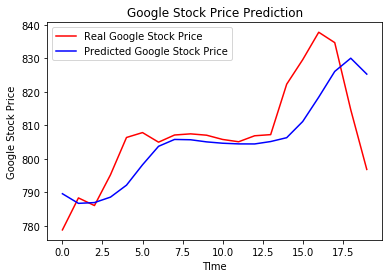

In [47]:
plt.plot(real_stock_price, color="red", label = "Real Google Stock Price")
plt.plot(predicted_stock_price, color="blue", label = "Predicted Google Stock Price")
plt.title("Google Stock Price Prediction")
plt.xlabel("TIme")
plt.ylabel("Google Stock Price")
plt.legend()